In [1]:
# Plots HIMF for Centrals and Satellites and plots on same graph
 
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput
import pandas as pd
from Functions import *

# import meraxes and set little h to 0.7
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)

# Get the snapshot, redshift and light time info
snaplist = meraxes.io.read_snaplist(fname_in, h)
#print('snapshots :', snaplist[0][1]) # uncomment to see available shapshots

# INPUT SNAP SHOT WANTED HERE
snapshot_used = 250
snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = round(redshift_used, 1) # round float to nearest whole int
    
# Read in Galaxy catalogue : Snapshot 192 corresponds to z = 1 
gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True)
gals["HIMass"] = np.log10(gals["HIMass"]*1e10)

# GET HIMFs
range_in = (5.5, 11.5)
himf_all = calc_mass_function(gals["HIMass"],  sim_props["Volume"], bins=50, range=range_in) # ALL GALS
himf_Types = return_himf_for_Gal_Types(gals, sim_props, range_in) # SEPARATE HIMF FOR TYPES
himf_Cen = himf_Types[0]
himf_Sat = himf_Types[1]
himf_Orp = himf_Types[2]

#print('himf_Cen: ', himf_Cen)
#print('himf_Sat: ', himf_Sat)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


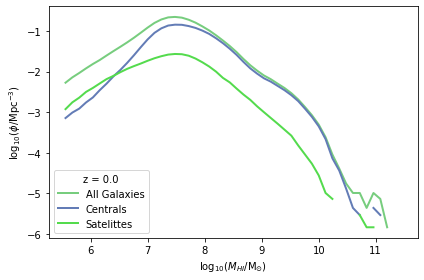

In [2]:

fig, ax = plt.subplots(1, 1)
label_z = ("z = " + str(redshift_used))
label_All = ("All Galaxies")
label_Cen = ("Centrals")
label_Sat = ("Satelittes")

# Plot the mass function
# HIMF[:,0] corresponds to all the elements in the 0th array (The Mass)
# HIMF[:,1] corresponds to all the elements in the 1st array (The Mass Function)

# ALL GALS
x_All = himf_all[:,0] # HI MASS
y_All = np.log10(himf_all[:,1]) # HIMF
ax.plot(x_All, y_All, color=np.random.rand(3,), lw=2,
        label=label_All)
#CENTRALS
x_Cen = himf_Cen[:, 0]
y_Cen = np.log10(himf_Cen[:, 1])
ax.plot(x_Cen, y_Cen, color=np.random.rand(3,), lw=2,
        label=label_Cen)
#SATELLITES
x_Sat = himf_Sat[:, 0]
y_Sat = np.log10(himf_Sat[:, 1])
ax.plot(x_Sat, y_Sat, color=np.random.rand(3,), lw=2,
        label=label_Sat)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Add the legend
ax.legend(title=label_z, loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()

redshift_string = str(redshift_used)
redshift_string = redshift_string.replace('.','-')
name_of_plot=("HIMassFunction_z-" + str(redshift_string) + "_CenSatAll")
plt.savefig("plots/" + name_of_plot + ".pdf")

In [3]:
# PLOT AGAIN WITH DATA

log_MHI_MV, log_HIMF_MV, HIMF_MV_err = get_Martin_data()
log_MHI_Zwaan, log_HIMF_Zwaan, MHI_Zwaan_err, HIMF_Zwaan_err = get_Zwaan_data()


Martin 1/ V_{max} 2010
log_MHI :  [ 6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7  8.9
  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9]
log_HIMF :  [-0.743 -0.839 -0.875 -0.935 -1.065 -1.13  -1.163 -1.224 -1.363 -1.46
 -1.493 -1.573 -1.664 -1.689 -1.673 -1.74  -1.893 -2.061 -2.288 -2.596
 -3.006 -3.641 -4.428 -5.32 ]
Zwaan 2005
log_MHI :  [ 7.186   7.3345  7.483   7.6315  7.78    7.9285  8.077   8.2255  8.374
  8.5225  8.671   8.8195  8.968   9.1165  9.265   9.4135  9.562   9.7105
  9.859  10.0075 10.156  10.3045 10.453  10.6015 10.75  ]
log_HIMF :  [-0.733  -0.8838 -1.1    -1.056  -1.207  -1.35   -1.315  -1.331  -1.308
 -1.31   -1.455  -1.555  -1.55   -1.69   -1.735  -1.843  -1.974  -2.166
 -2.401  -2.785  -3.013  -3.417  -4.044  -4.83   -5.451 ]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


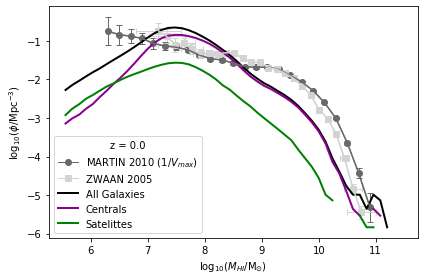

In [5]:
# FULL PLOT FOR DRAGONS, ZWAAN 2005 AND MARTINS 2010

# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
label_All = ("All Galaxies")
label_Cen = ("Centrals")
label_Sat = ("Satelittes")
label_MARTIN = ("MARTIN 2010 (1/$V_{max}$)")
label_ZWAAN =('ZWAAN 2005')

# MARTIN 2010
# log_MHI_MV = data_MV[:,0]
# log_HIMF_MV = data_MV[:,1]
ax.plot(log_MHI_MV, log_HIMF_MV, marker='o',color='dimgray',lw=1,
        label=label_MARTIN)
ax.errorbar(log_MHI_MV, log_HIMF_MV,xerr=None,yerr=HIMF_MV_err, 
            color='dimgray',elinewidth=1,capsize=3)

# ZWAAN 2005
#log_MHI_Zwaan = data_Zwaan[:,0]
ax.plot(log_MHI_Zwaan, log_HIMF_Zwaan, marker='s',color='lightgray',
        lw=1, label=label_ZWAAN) # change to np.random.rand(3,) for random colours
ax.errorbar(log_MHI_Zwaan, log_HIMF_Zwaan, xerr=MHI_Zwaan_err, yerr=HIMF_Zwaan_err,
            color='lightgray',elinewidth=1,capsize=3)

# DRAGONS
# ALL GALS
x_All = himf_all[:,0] # HI MASS
y_All = np.log10(himf_all[:,1]) # HIMF
ax.plot(x_All, y_All, color='black', lw=2,label=label_All)
#CENTRALS
x_Cen = himf_Cen[:, 0]
y_Cen = np.log10(himf_Cen[:, 1])
ax.plot(x_Cen, y_Cen, color='darkmagenta', lw=2,label=label_Cen)
#SATELLITES
x_Sat = himf_Sat[:, 0]
y_Sat = np.log10(himf_Sat[:, 1])
ax.plot(x_Sat, y_Sat, color='g', lw=2, label=label_Sat)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Add the legend
label_z = ("z = " + str(redshift_used))
ax.legend(title=label_z, loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_CenSatAllgalaxies_wDATA")
plt.savefig("final_plots/HIMF/" + name_of_plot + ".pdf")